# Deep Neural Network (DNN)
- Fashion MNIST Database
- Reference: TensorFlow Tutorial (https://www.tensorflow.org/tutorials/keras/classification?hl=en)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## 데이터 불러오기 Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리 Preprocess the data

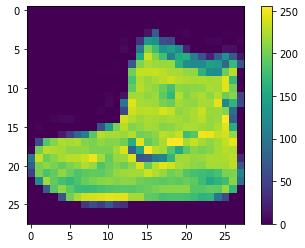

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
'Normalization'

train_images = train_images / 255.0

test_images = test_images / 255.0

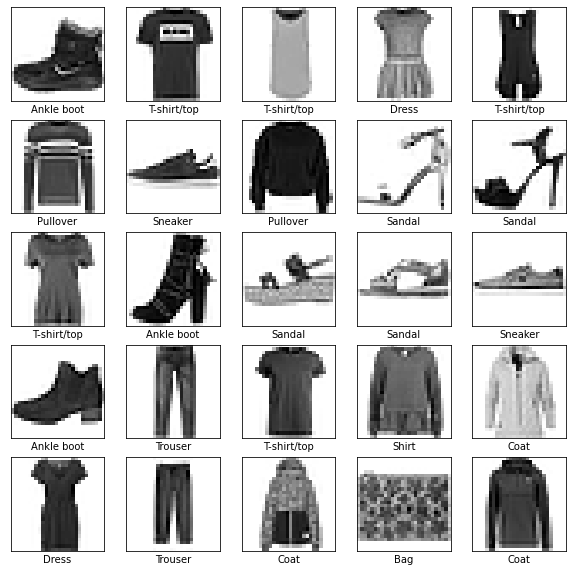

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구축 Build the model

#### 층 설정 Set up the layers

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # [N, 28, 28, 1] -> [N, 784]
    tf.keras.layers.Dense(128, activation='relu'),    # 1st dense layer: 128 nodes
    tf.keras.layers.Dense(10)    # 2nd dense layer: returns a logits array with length of 10
])

#### 모델 컴파일 Compile the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 학습 Train the model
#### 학습용 데이터 투입 Feed the model

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.4958 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.3760 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3395 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 2s 846us/step - loss: 0.3163 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.2961 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 2s 837us/step - loss: 0.2835 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.2607 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.2478 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 2s 831us/st

#### 정확도 평가 Evaluate accuracy

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3333 - accuracy: 0.8896

Test accuracy: 0.8895999789237976


#### 예측하기 Make predictions

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [12]:
predictions[0]

array([2.5375076e-08, 1.3551338e-10, 7.5725864e-10, 2.3929832e-12,
       3.0100819e-10, 3.2114482e-03, 8.5005311e-08, 4.0975370e-02,
       1.9302389e-08, 9.5581305e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [14]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

#### 예측 검증 Verify predictions

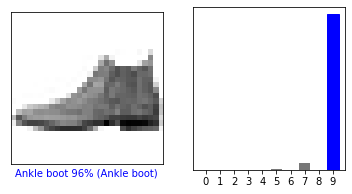

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

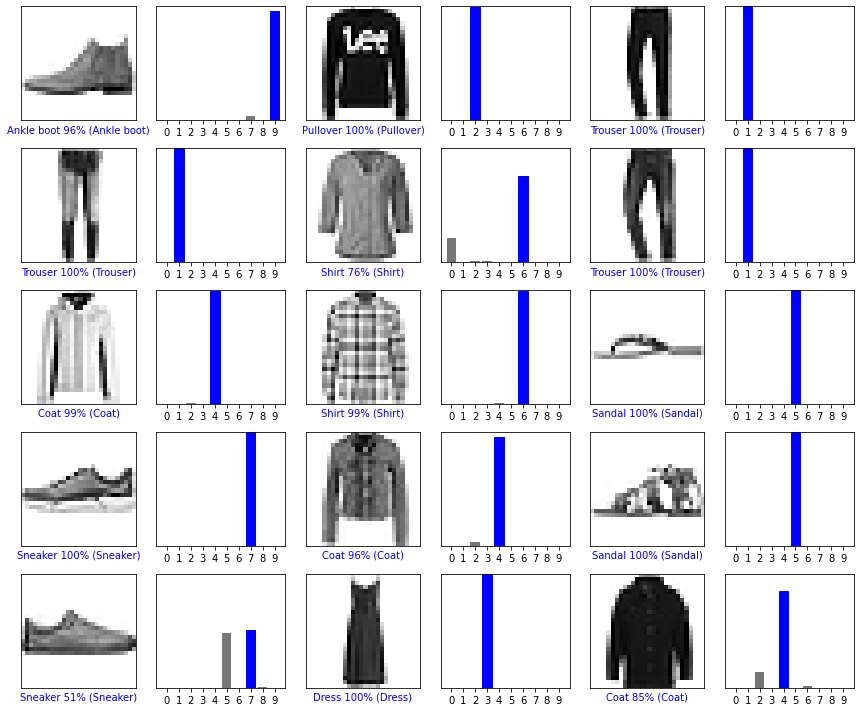

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 모델 사용 Use the trained model

In [17]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [18]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [19]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1131610e-05 9.6788161e-11 9.9779946e-01 3.4020462e-18 2.0852345e-03
  2.1781498e-13 1.0403998e-04 3.4754301e-22 1.0077807e-13 3.4634517e-15]]


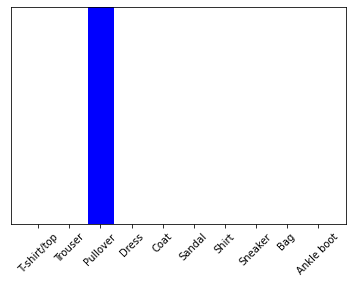

In [20]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [21]:
np.argmax(predictions_single[0])

2